Sequoia problem:  blue


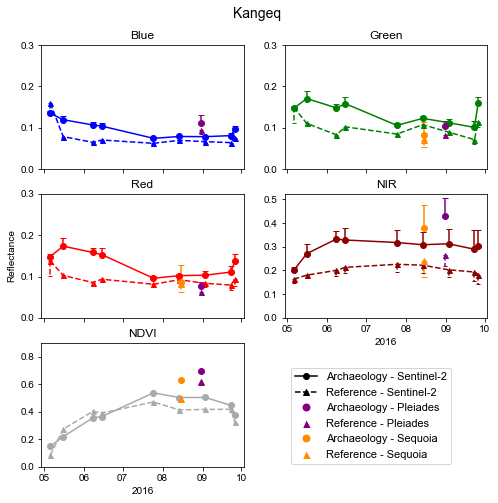

In [9]:
# Code for creating article figure 6

from satfunc import *
import os
import glob
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

# input
bandList = ['blue','green','red','nir']
site = 'kangeq'
pleiades = True # Include pleiades? - True/False
sequoia = True # Include sequoia? - True/False

# Sentinel-2 images
bandDict = {'blue':'band_2','green':'band_3','red':'band_4','nir':'band_8'}
inFolder = '/Volumes/RASMUS_1/Satellite/remains_sites/'+site+'/S2/atmcorr'
# shapefiles with footprint
polyShpNat = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_natural_poly.shp'
polyShpCul = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_cultural_poly.shp'
bandDictNat = {}
bandDictCul = {}
for band in bandList:
    imgFile = os.path.join(inFolder, bandDict[band] + '_moved.tif')
    if site == 'qoornoq' or site == 'sandnes':
        imgFile = os.path.join(inFolder, bandDict[band] + '.tif')
    meanListNat,stdListNat,countListNat = raster_extract(imgFile, polyShpNat, False)# all touched = False
    bandDictNat[band] = [meanListNat,stdListNat,countListNat]
    meanListCul,stdListCul,countListCul = raster_extract(imgFile, polyShpCul, False)# all touched = False
    bandDictCul[band] = [meanListCul,stdListCul,countListCul]
#print countListNat
#print countListCul

if pleiades:
    # pleiades image
    inFile = glob.glob('/Volumes/RASMUS_1/Satellite/remains_sites/'+site+'/pleiades/*atmcorr_subset_moved.tif')[0]
    if site == 'kangeq':
        # avoid shade in natural area footprint at Kangeq
        polyShpNat = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_natural_poly_pleiades.shp'
    else:
        polyShpNat = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_natural_poly.shp'
    polyShpCul = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_cultural_poly.shp'
    meanListNat,stdListNat,countListNat = raster_extract(inFile, polyShpNat, False)
    meanListCul,stdListCul,countListCul = raster_extract(inFile, polyShpCul, False)
    bdNatPleiades = {}
    bdCulPleiades = {}
    for num in range(4):
        bdNatPleiades[bandList[num]] = [meanListNat[num],stdListNat[num],countListNat[num]]
        bdCulPleiades[bandList[num]] = [meanListCul[num],stdListCul[num],countListCul[num]]
    #print countListNat
    #print countListCul

if sequoia:
    # sequoia image (use same shapefiles as pleiades)
    inFile = glob.glob('/Volumes/RASMUS_1/Satellite/remains_sites/'+site+'/sequoia/*_seqirrad_empcorr_moved.tif')[0]
    polyShpNat = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_natural_poly.shp'
    polyShpCul = '/Volumes/RASMUS_1/Satellite/analysis/shapefiles/'+site+'_cultural_poly.shp'
    meanListNat,stdListNat,countListNat = raster_extract(inFile, polyShpNat, False)
    meanListCul,stdListCul,countListCul = raster_extract(inFile, polyShpCul, False)
    bdNatSequoia = {}
    bdCulSequoia = {}
    bandNum = [1,2,3]
    seqNum = [0,1,3]
    for num in range(3):
        bdNatSequoia[bandList[bandNum[num]]] = [meanListNat[seqNum[num]],stdListNat[seqNum[num]],countListNat[seqNum[num]]]
        bdCulSequoia[bandList[bandNum[num]]] = [meanListCul[seqNum[num]],stdListCul[seqNum[num]],countListCul[seqNum[num]]]
    #print countListNat
    #print countListCul
        
# Plot data
colDict = {'blue':'b',
           'green':'g',
           'red':'r',
           'nir':'darkred'}

channelList = ['Blue', 'Green', 'Red', 'NIR']

from datetime import datetime
import matplotlib.pyplot as plt

# change font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

dtList = []
with open(os.path.join(inFolder,'band_timestamp.txt'), 'r') as txt:
    ts = txt.readlines()
ts = [datetime.strptime(x.strip()[0:8],'%Y%m%d') for x in ts]
if site == 'kangeq':
    tsPleiades = datetime.strptime('20160831','%Y%m%d')
else:
    tsPleiades = datetime.strptime('20160723','%Y%m%d')
tsSequoia = datetime.strptime('20160815','%Y%m%d')

def half_std(stdList, direction='up'):
    zerotup = ()
    for elem in stdList:
        zerotup += (0,)
    if direction == 'down':
        stdList = [x * -1. for x in stdList]
    return [zerotup, stdList]

def ndvi(nir,red):
    ndvi = (nir-red)/(nir+red)
    return ndvi

plot = 421
for num in range(len(bandList)):
    band = bandList[num]
    ax = plt.subplot(plot)
    if num in range(0,3):
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        plt.setp(ax.get_xticklabels(), rotation='vertical')
        # modify x-axis
        plt.xticks(rotation=0)
        months = mdates.MonthLocator()
        monthsFmt = mdates.DateFormatter('%m')
        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(monthsFmt)
        plt.xlabel('2016')
        
    # S2
    eb = plt.errorbar(ts, bandDictNat[band][0], ls='--', c=colDict[band], yerr=half_std(bandDictNat[band][1],'down'), marker='^', ms=5, capsize=2)
    plt.errorbar(ts, bandDictCul[band][0], c=colDict[band], yerr=half_std(bandDictCul[band][1],'up'), marker='o',capsize=3)

    # pleiades
    if pleiades:
        ebp = plt.errorbar(tsPleiades, bdNatPleiades[band][0], c='purple', yerr=half_std([bdNatPleiades[band][1]],'down'), marker='^', ms=5, capsize=2)
        plt.errorbar(tsPleiades, bdCulPleiades[band][0], c='purple', yerr=half_std([bdCulPleiades[band][1]],'up'), marker='o', capsize=3)
    # Sequoia
    if sequoia:
        try:
            ebs = plt.errorbar(tsSequoia, bdNatSequoia[band][0], c='darkorange', yerr=half_std([bdNatSequoia[band][1]],'down'), marker='^', capsize=3)
            plt.errorbar(tsSequoia, bdCulSequoia[band][0], c='darkorange', yerr=half_std([bdCulSequoia[band][1]],'up'), marker='o', capsize=3)
            ebs[-1][0].set_linestyle('--')
        except:
            print 'Sequoia problem: ', band
    
    # modify errorbar linestyle
    eb[-1][0].set_linestyle('--')
    if pleiades:
        ebp[-1][0].set_linestyle('--')
    # modify y axis
    if num in range(0,3):
        plt.yticks(np.arange(0, 0.31, step=0.1))
    elif num == 3:
        plt.yticks(np.arange(0, 0.51, step=0.1))
    if num == 2:
        plt.ylabel('Reflectance')
    # modify x-axis
    plt.xticks(rotation=0)
    # add title
    plt.title(channelList[num])
    plot+=1

# Add NDVI
num += 1
ax = plt.subplot(plot)    
if num in range(0,3):
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    plt.setp(ax.get_xticklabels(), rotation='vertical')
# modify x-axis
plt.xticks(rotation=0)
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xlabel('2016')

#Sentinel
ndviNat = ndvi(np.array(bandDictNat['nir'][0]),np.array(bandDictNat['red'][0]))
ndviCul = ndvi(np.array(bandDictCul['nir'][0]),np.array(bandDictCul['red'][0]))
eb = plt.errorbar(ts, ndviNat, ls='--', c='darkgrey', marker='^', ms=5, capsize=2)
plt.errorbar(ts, ndviCul, c='darkgrey', marker='o',capsize=3)

#Sequoia
if sequoia:
    ndviSeqNat = ndvi(np.array(bdNatSequoia['nir'][0]),np.array(bdNatSequoia['red'][0]))
    ndviSeqCul = ndvi(np.array(bdCulSequoia['nir'][0]),np.array(bdCulSequoia['red'][0]))
    ebs = plt.errorbar(tsSequoia, ndviSeqNat, c='darkorange', marker='^', capsize=3)
    plt.errorbar(tsSequoia, ndviSeqCul, c='darkorange', marker='o', capsize=3)
    #ebs[-1][0].set_linestyle('--')
#Pleiades
if pleiades:
    ndviPleNat = ndvi(np.array(bdNatPleiades['nir'][0]),np.array(bdNatPleiades['red'][0]))
    ndviPleCul = ndvi(np.array(bdCulPleiades['nir'][0]),np.array(bdCulPleiades['red'][0]))
    ebp = plt.errorbar(tsPleiades, ndviPleNat, c='purple', marker='^', capsize=3)
    plt.errorbar(tsPleiades, ndviPleCul, c='purple', marker='o', capsize=3)
plt.title('NDVI')
plt.ylim([0.0,0.9])

fig = plt.gcf()
title = fig.suptitle('Kangeq', y=0.93, fontsize=14)
fig.set_size_inches(8, 10.5)

# make legend
legend_elements = [Line2D([0], [0], color='black', marker= 'o', label='Archaeology - Sentinel-2'),
                   Line2D([0], [0], color='black', ls= '--', marker= '^', label='Reference - Sentinel-2'),
                   Line2D([0], [0], marker='o', color='w', label='Archaeology - Pleiades', markerfacecolor='purple', markersize=9),
                   Line2D([0], [0], marker='^', color='w', label='Reference - Pleiades', markerfacecolor='purple', markersize=9),
                   Line2D([0], [0], marker='o', color='w', label='Archaeology - Sequoia', markerfacecolor='darkorange', markersize=9),
                   Line2D([0], [0], marker='^', color='w', label='Reference - Sequoia', markerfacecolor='darkorange', markersize=9)]

#legend_elements = [Line2D([0], [0], color='black', marker= 'o', label='Archaeology - Sentinel-2A'),
#                   Line2D([0], [0], color='black', ls= '--', marker= '^', label='Reference - Sentinel-2A')]


fname = '/Users/rasmus/Google Drive/Phd/Skrivning/paper 1/figures/raw/sat_atmcorr_time_'+site+'.png'
# save with legend
lgd = plt.legend(handles = legend_elements, bbox_to_anchor=(1.23, 0.8), loc=2, borderaxespad=0., prop={'size': 11})
#fig.savefig(fname, dpi=600, bbox_extra_artists = (lgd,title), bbox_inches = 'tight')

# save without legend
#lgd = False
#fig.savefig(fname, dpi=600, bbox_inches = 'tight')

plt.show()

In [ ]:
# Merge the two subfigures (Kangeq, Iffiartafik) in figure 6 to one file

import sys
from PIL import Image
import os

fileList = []
path = '/Users/rasmus/Google Drive/Phd/Skrivning/paper 1/figures/raw'
fileList.append(os.path.join(path,'sat_atmcorr_time_kangeq.png'))
fileList.append(os.path.join(path,'sat_atmcorr_time_iffiartafik.png'))

images = map(Image.open, fileList)
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)+200
max_height = min(heights)

new_im = Image.new('RGB', (total_width, max_height), color=(255,255,255))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0] + 200

new_im.save(os.path.join(path,'figure_6_merge.jpg'))

In [12]:
# Time integrate - test

print ts
natNir = []
for val in bandDictNat[band][0]:
    natNir.append(val)
print natNir

from scipy.integrate import simps

y = natNir
x = []
lastDate = 0
lastRec = 0
for num in range(len(ts)):
    if num == 0:
        x.append(num)
        lastDate = ts[num]
        lastRec = 0
    else:
        days = ts[num]-lastDate
        newRec = lastRec + days.days
        x.append(newRec)
        lastDate = ts[num]
        lastRec=newRec
print natNir
print x
I1 = simps(y, x)
print I1

[datetime.datetime(2016, 5, 6, 0, 0), datetime.datetime(2016, 5, 16, 0, 0), datetime.datetime(2016, 6, 8, 0, 0), datetime.datetime(2016, 6, 15, 0, 0), datetime.datetime(2016, 7, 25, 0, 0), datetime.datetime(2016, 8, 14, 0, 0), datetime.datetime(2016, 9, 3, 0, 0), datetime.datetime(2016, 9, 23, 0, 0), datetime.datetime(2016, 9, 26, 0, 0)]
[0.1631639301776886, 0.1801481992006302, 0.20032748579978943, 0.21305085718631744, 0.22581350803375244, 0.22203373908996582, 0.2026766836643219, 0.19334381818771362, 0.18282970786094666]
[0.1631639301776886, 0.1801481992006302, 0.20032748579978943, 0.21305085718631744, 0.22581350803375244, 0.22203373908996582, 0.2026766836643219, 0.19334381818771362, 0.18282970786094666]
[0, 10, 33, 40, 80, 100, 120, 140, 143]
30.1913446191
